In [1]:
import sys
sys.path.insert(0,'/Users/walfits/Repositories/YAMLP/SciFlow')
import ImportData as imp

In [2]:
X = imp.loadX("/Users/walfits/Repositories/trainingNN/dataSets/XYQ/X_pbe.csv")
y = imp.loadY("/Users/walfits/Repositories/trainingNN/dataSets/XYQ/Y_pbe.csv")

In [3]:
import pandas as pd
df_X = pd.DataFrame(X)
columns = range(0,28,4)
print columns

[0, 4, 8, 12, 16, 20, 24]


In [4]:
df_clean = df_X.drop(columns, axis=1)
print df_X.shape, df_clean.shape

(47733, 28) (47733, 21)


In [5]:
X_clean = df_clean.as_matrix()
print X_clean.shape

(47733, 21)


In [6]:
import pruning as pr
from datetime import datetime

prun = pr.Pruning(X_clean, y)
startTime = datetime.now()
idx_clus = prun.clustering(23866)
endTime = datetime.now()
finalTime = endTime - startTime
print "Evaluation took " + str(finalTime)

/Users/walfits/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=23866. Setting it to 3*k
  init_size=init_size)


Evaluation took 1:04:46.086375


In [17]:
import numpy as np
fileName =  open("idx_clus.npz", "w")
np.savez(fileName, idx_clus)
fileName.close()

In [10]:
X_clus = X_clean[idx_clus, :]
y_clus = y[idx_clus]

In [11]:
df_X_clus = pd.DataFrame(X_clus)
df_X_clus.columns=['C1x', 'C1y', 'C1z', 'H1x', 'H1y', 'H1z', 'H2x', 'H2y', 'H2z', 'H3x', 'H3y', 'H3z', 'H4x', 'H4y', 'H4z', 'C2x', 'C2y', 'C2z', 'Nx', 'Ny', 'Nz']

In [12]:
df_X_clus['CC_dist'] = np.sqrt((df_X_clus.C1x - df_X_clus.C2x)**2 + (df_X_clus.C1y - df_X_clus.C2y)**2 + (df_X_clus.C1z - df_X_clus.C2z)**2)
df_X_clus['ene'] = y_clus.reshape((len(y_clus),1))

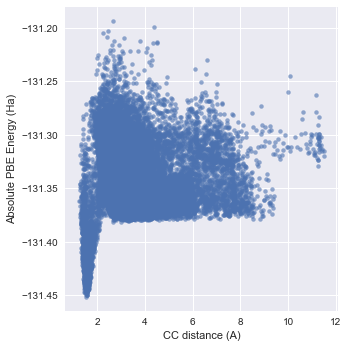

In [14]:
import seaborn as sns
lm = sns.lmplot('CC_dist','ene', data=df_X_clus, scatter_kws={"s": 20, "alpha": 0.6}, fit_reg=False)
lm.set(xlabel='CC distance (A)', ylabel='Absolute PBE Energy (Ha)')
lm.savefig("PBE_kmeans.png", dpi=600)
sns.plt.show()

In [15]:
df_clean.columns=['C1x', 'C1y', 'C1z', 'H1x', 'H1y', 'H1z', 'H2x', 'H2y', 'H2z', 'H3x', 'H3y', 'H3z', 'H4x', 'H4y', 'H4z', 'C2x', 'C2y', 'C2z', 'Nx', 'Ny', 'Nz']
df_clean['CC_dist'] = np.sqrt((df_clean.C1x - df_clean.C2x)**2 + (df_clean.C1y - df_clean.C2y)**2 + (df_clean.C1z - df_clean.C2z)**2)
df_clean['ene'] = y.reshape((len(y),1))

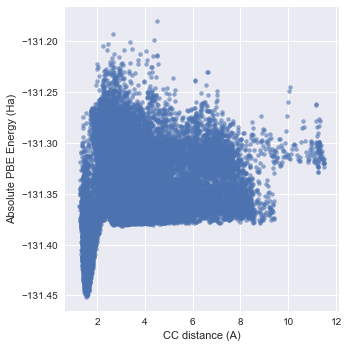

In [16]:
lm = sns.lmplot('CC_dist','ene', data=df_clean, scatter_kws={"s": 20, "alpha": 0.6}, fit_reg=False)
lm.set(xlabel='CC distance (A)', ylabel='Absolute PBE Energy (Ha)')
lm.savefig("PBE_no-pruning.png", dpi=600)
sns.plt.show()